# Introduction
## Features: 
<body>
CRIM - per capita crime rate by town <br>
ZN - proportion of residential land zoned for lots over 25,000 sq.ft. <br>
INDUS - proportion of non-retail business acres per town. <br>
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise) <br>
NOX - nitric oxides concentration (parts per 10 million) <br>
RM - average number of rooms per dwelling <br>
AGE - proportion of owner-occupied units built prior to 1940 <br>
DIS - weighted distances to five Boston employment centres <br>
RAD - index of accessibility to radial highways <br>
TAX - full-value property-tax rate per $10,000 <br>
PTRATIO - pupil-teacher ratio by town <br>
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town <br>
LSTAT - % lower status of the population <br>
MEDV - Median value of owner-occupied homes in $1000's <br>
</body>


## Neural Network Model

In [347]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from sklearn import metrics
from sklearn.linear_model import LinearRegression

%matplotlib inline
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

print('Libraries are imported.')

Libraries are imported.


In [348]:
def plot_loss(history):
    h = history.history
    x_lim = len(h['loss'])
    plt.figure(figsize=(8, 8))
    plt.plot(range(x_lim), h['val_loss'], label = 'Validation Loss')
    plt.plot(range(x_lim), h['loss'], label = 'Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    return

In [349]:
data = pd.read_csv('BostonHousing.csv')
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [350]:
data.shape

(506, 14)

In [351]:
data.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [352]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [353]:
d_norm = (data - data.mean()) / data.std()                                       

y_mean = data['medv'].mean()
y_std = data['medv'].std()

def unnormalise_value(pred):       
    return int(pred * y_std + y_mean)

d_norm.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,-0.419367,0.284548,-1.286636,-0.272329,-0.144075,0.413263,-0.119895,0.140075,-0.981871,-0.665949,-1.457558,0.440616,-1.074499,0.159528
1,-0.416927,-0.487240,-0.592794,-0.272329,-0.739530,0.194082,0.366803,0.556609,-0.867024,-0.986353,-0.302794,0.440616,-0.491953,-0.101424
2,-0.416929,-0.487240,-0.592794,-0.272329,-0.739530,1.281446,-0.265549,0.556609,-0.867024,-0.986353,-0.302794,0.396035,-1.207532,1.322937
3,-0.416338,-0.487240,-1.305586,-0.272329,-0.834458,1.015298,-0.809088,1.076671,-0.752178,-1.105022,0.112920,0.415751,-1.360171,1.181589
4,-0.412074,-0.487240,-1.305586,-0.272329,-0.834458,1.227362,-0.510674,1.076671,-0.752178,-1.105022,0.112920,0.440616,-1.025487,1.486032


In [354]:
X=d_norm.iloc[:,:13].values
y=d_norm['medv'].values
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [355]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state=0) 

In [356]:
def get_model():
    
    model = Sequential([
        Dense(10, input_shape = (13,), activation = 'relu'),        
        Dense(20, activation = 'relu'),                
        Dense(5, activation = 'relu'),                      
        Dense(1)                                           
    ])                                                      

    model.compile(
        loss='mse',                                         #Trained using Mean square error loss (Cost function) 
        optimizer='adam'                                    #Optimizer used is 'adam' (One of the Fastest optimizers)
    )
    
    return model

model = get_model()
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_124 (Dense)            (None, 10)                140       
_________________________________________________________________
dense_125 (Dense)            (None, 20)                220       
_________________________________________________________________
dense_126 (Dense)            (None, 5)                 105       
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 6         
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [357]:
early_stop = EarlyStopping(monitor='val_loss', patience = 10) #Defining early stopping parameter (optional, to save time)

model = get_model()

preds_on_untrained = model.predict(X_test) 

history = model.fit(
    X_train, y_train,
    validation_data = (X_test, y_test),
    epochs = 150,
    callbacks = [early_stop]
)

Epoch 1/150
13/13 [==============================] - 0s 27ms/step - loss: 5.0215 - val_loss: 3.4187
Epoch 2/150
13/13 [==============================] - 0s 11ms/step - loss: 3.2705 - val_loss: 2.2455
Epoch 3/150
13/13 [==============================] - 0s 11ms/step - loss: 2.2101 - val_loss: 1.4964
Epoch 4/150
13/13 [==============================] - 0s 10ms/step - loss: 1.5026 - val_loss: 1.0587
Epoch 5/150
13/13 [==============================] - 0s 10ms/step - loss: 1.0651 - val_loss: 0.8324
Epoch 6/150
13/13 [==============================] - 0s 11ms/step - loss: 0.8119 - val_loss: 0.7134
Epoch 7/150
13/13 [==============================] - 0s 12ms/step - loss: 0.6536 - val_loss: 0.6523
Epoch 8/150
13/13 [==============================] - 0s 12ms/step - loss: 0.5682 - val_loss: 0.6157
Epoch 9/150
13/13 [==============================] - 0s 13ms/step - loss: 0.5118 - val_loss: 0.5913
Epoch 10/150
13/13 [==============================] - 0s 13ms/step - loss: 0.4720 - val_loss: 0.5706

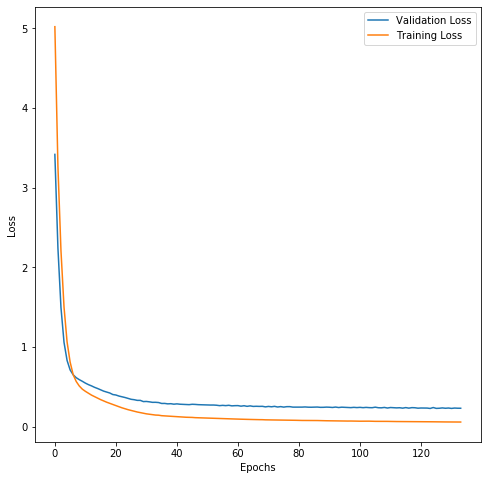

In [358]:
plot_loss(history)

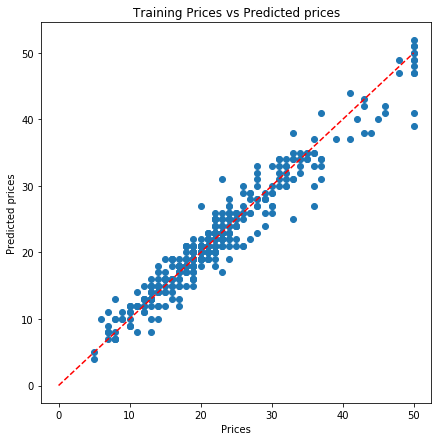

In [359]:
y_train_pred = model.predict(X_train)
y_train_pred = [unnormalise_value(y) for y in y_train_pred]
y_train_label = [unnormalise_value(y) for y in y_train]
plt.figure(figsize=(7, 7))
plt.scatter(y_train_label, y_train_pred)
plt.plot([0,50],[0,50],'r--')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Training Prices vs Predicted prices")
plt.show()

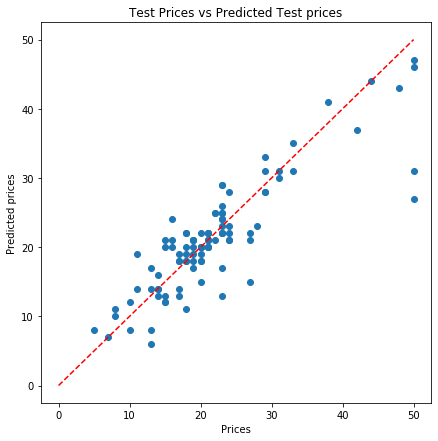

In [360]:
y_test_pred = model.predict(X_test)
y_test_pred = [unnormalise_value(y) for y in y_test_pred]
y_test_label = [unnormalise_value(y) for y in y_test]
plt.figure(figsize=(7, 7))
plt.scatter(y_test_label, y_test_pred)
plt.plot([0,50],[0,50],'r--')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Test Prices vs Predicted Test prices")
plt.show()

In [361]:
print('Training Prediction Accuracy-->\n')
print('R^2:',metrics.r2_score(y_train_label, y_train_pred))
print('MAE:',metrics.mean_absolute_error(y_train_label, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train_label, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_label, y_train_pred)))

Training Prediction Accuracy-->

R^2: 0.939576820561478
MAE: 1.6262376237623761
MSE: 5.195544554455446
RMSE: 2.279373719786961


In [362]:
print('Test Prediction Accuracy-->\n')
print('R^2:',metrics.r2_score(y_test_label, y_test_pred))
print('MAE:',metrics.mean_absolute_error(y_test_label, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test_label, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_label, y_test_pred)))

Test Prediction Accuracy-->

R^2: 0.751489351776259
MAE: 2.9313725490196076
MSE: 20.480392156862745
RMSE: 4.52552672700789


## Linear Regression Model

In [363]:
lrmodel = LinearRegression()
lrmodel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [364]:
print('Intercept',lrmodel.intercept_)
print('Parameters',lrmodel.coef_)

Intercept -0.005703256031585247
Parameters [-0.11170888  0.11355512  0.0040916   0.06464537 -0.20314718  0.28332859
 -0.00955245 -0.31742067  0.23117321 -0.20138531 -0.24620385  0.08050481
 -0.38262731]


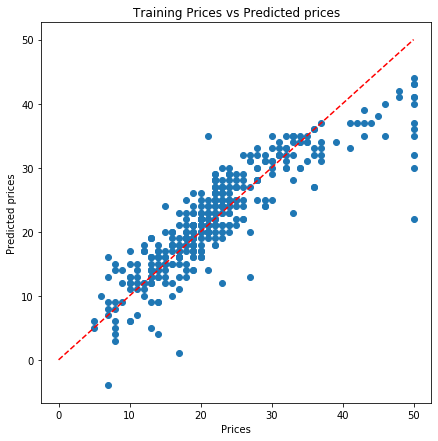

In [365]:
y_train_pred = lrmodel.predict(X_train)
y_train_pred = [unnormalise_value(y) for y in y_train_pred]
y_train_label = [unnormalise_value(y) for y in y_train]
plt.figure(figsize=(7, 7))
plt.scatter(y_train_label, y_train_pred)
plt.plot([0,50],[0,50],'r--')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Training Prices vs Predicted prices")
plt.show()

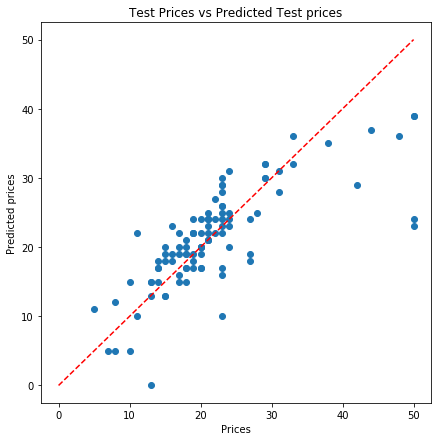

In [366]:
y_test_pred = lrmodel.predict(X_test)
y_test_pred = [unnormalise_value(y) for y in y_test_pred]
y_test_label = [unnormalise_value(y) for y in y_test]
plt.figure(figsize=(7, 7))
plt.scatter(y_test_label, y_test_pred)
plt.plot([0,50],[0,50],'r--')
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Test Prices vs Predicted Test prices")
plt.show()

In [367]:
print('Training Prediction Accuracy-->\n')
print('R^2:',metrics.r2_score(y_train_label, y_train_pred))
print('MAE:',metrics.mean_absolute_error(y_train_label, y_train_pred))
print('MSE:',metrics.mean_squared_error(y_train_label, y_train_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_label, y_train_pred)))

Training Prediction Accuracy-->

R^2: 0.7722400210969096
MAE: 3.0693069306930694
MSE: 19.584158415841586
RMSE: 4.425399238017016


In [368]:
print('Test Prediction Accuracy-->\n')
print('R^2:',metrics.r2_score(y_test_label, y_test_pred))
print('MAE:',metrics.mean_absolute_error(y_test_label, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test_label, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_label, y_test_pred)))

Test Prediction Accuracy-->

R^2: 0.5810174710177043
MAE: 3.843137254901961
MSE: 34.529411764705884
RMSE: 5.876173224531922
